In [1]:
import pandas as pd
import math
import numpy as np
import scipy
import os
import seaborn as sns
from scipy.stats import binom, hypergeom
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
master_df = pd.read_csv('flatiron_mod3proj/master_final.csv')
print(master_df.shape)
master_df.head()

(1421, 27)


,Unnamed: 0,recipient_parent_name1,current_award,potential_award,offers_received,num_employees,annual_revenue,award_count,recipient_name,organizational_type,...,Republicans,Soft_Indivs,Soft_Orgs,Total,Total1,org_id,org_name,org_name_clean,DemShare,RepShare
0,0,3MCOMPANY,7.838262e+06,4.342798e+07,18310,2.854455e+06,1.030000e+12,1,3M COMPANY,NaN,...,257681,0,0,438175,438175,D000021800,3M CO,3m,0.411922,0.588078
1,1,ABBLTD,3.163537e+05,3.163537e+05,5,2.164675e+04,6.203500e+09,1,ABB LTD,CORPORATE NOT TAX EXEMPT,...,10850,0,0,21536,21536,D000023729,ABB GROUP,abb,0.496192,0.503808
2,2,ABBOTTLABORATORIES,2.329304e+07,6.244787e+07,149,5.342950e+04,1.786237e+09,1,ABBOTT LABORATORIES,NaN,...,709850,5000,0,1285641,1285641,D000000383,ABBOTT LABORATORIES,abbott laboratories,0.447863,0.552137
3,3,ADVANCEDACOUSTICCONCEPTSINC,2.627054e+07,5.877078e+07,5,2.000000e+02,2.691478e+07,1,ADVANCED ACOUSTIC CONCEPTS INC.,CORPORATE NOT TAX EXEMPT,...,23300,0,0,142850,142850,D000023762,ADVANCED ACOUSTIC CONCEPTS,advanced acoustic concepts,0.836892,0.163108
4,4,AFOGNAKNATIVECORPORATION,4.654850e+08,1.040796e+09,430,4.909336e+02,1.786700e+07,1,AFOGNAK NATIVE CORPORATION,NaN,...,3750,0,0,9820,9820,D000023779,AFOGNAK NATIVE CORP,afognak native,0.618126,0.381874


In [3]:
master_df = master_df[[
#  'Unnamed: 0',
 'recipient_parent_name1',
 'recipient_name_clean',
 'recipient_name',
 'org_name_clean',
 'org_name',
 'current_award',
 'potential_award',
#  'offers_received',
 'num_employees',
 'annual_revenue',
#  'award_count',
#  'organizational_type',
#  'business_size',
 'year',
#  'Cycle',
 'Democrats',
 'Republicans',
#  'Individuals',
 'PACs',
#  'Soft_Indivs',
 'Soft_Orgs',
#  'Total',
 'Total1',
#  'org_id',
#  'DemShare',
#  'RepShare'
]]

In [4]:
print(master_df.shape)
master_df.head()

(1421, 15)


,recipient_parent_name1,recipient_name_clean,recipient_name,org_name_clean,org_name,current_award,potential_award,num_employees,annual_revenue,year,Democrats,Republicans,PACs,Soft_Orgs,Total1
0,3MCOMPANY,3m,3M COMPANY,3m,3M CO,7.838262e+06,4.342798e+07,2.854455e+06,1.030000e+12,2008,180494,257681,284404,0,438175
1,ABBLTD,abb,ABB LTD,abb,ABB GROUP,3.163537e+05,3.163537e+05,2.164675e+04,6.203500e+09,2008,10686,10850,18000,0,21536
2,ABBOTTLABORATORIES,abbott laboratories,ABBOTT LABORATORIES,abbott laboratories,ABBOTT LABORATORIES,2.329304e+07,6.244787e+07,5.342950e+04,1.786237e+09,2008,575791,709850,1028497,0,1285641
3,ADVANCEDACOUSTICCONCEPTSINC,advanced acoustic concepts,ADVANCED ACOUSTIC CONCEPTS INC.,advanced acoustic concepts,ADVANCED ACOUSTIC CONCEPTS,2.627054e+07,5.877078e+07,2.000000e+02,2.691478e+07,2008,119550,23300,107600,0,142850
4,AFOGNAKNATIVECORPORATION,afognak native,AFOGNAK NATIVE CORPORATION,afognak native,AFOGNAK NATIVE CORP,4.654850e+08,1.040796e+09,4.909336e+02,1.786700e+07,2008,6070,3750,6000,0,9820


Add `PACs` and `Soft_orgs`

In [5]:
master_df['pacs_plus_softorgs'] = master_df.PACs + master_df.Soft_Orgs
print(master_df.shape)
master_df.head()

(1421, 16)


,recipient_parent_name1,recipient_name_clean,recipient_name,org_name_clean,org_name,current_award,potential_award,num_employees,annual_revenue,year,Democrats,Republicans,PACs,Soft_Orgs,Total1,pacs_plus_softorgs
0,3MCOMPANY,3m,3M COMPANY,3m,3M CO,7.838262e+06,4.342798e+07,2.854455e+06,1.030000e+12,2008,180494,257681,284404,0,438175,284404
1,ABBLTD,abb,ABB LTD,abb,ABB GROUP,3.163537e+05,3.163537e+05,2.164675e+04,6.203500e+09,2008,10686,10850,18000,0,21536,18000
2,ABBOTTLABORATORIES,abbott laboratories,ABBOTT LABORATORIES,abbott laboratories,ABBOTT LABORATORIES,2.329304e+07,6.244787e+07,5.342950e+04,1.786237e+09,2008,575791,709850,1028497,0,1285641,1028497
3,ADVANCEDACOUSTICCONCEPTSINC,advanced acoustic concepts,ADVANCED ACOUSTIC CONCEPTS INC.,advanced acoustic concepts,ADVANCED ACOUSTIC CONCEPTS,2.627054e+07,5.877078e+07,2.000000e+02,2.691478e+07,2008,119550,23300,107600,0,142850,107600
4,AFOGNAKNATIVECORPORATION,afognak native,AFOGNAK NATIVE CORPORATION,afognak native,AFOGNAK NATIVE CORP,4.654850e+08,1.040796e+09,4.909336e+02,1.786700e+07,2008,6070,3750,6000,0,9820,6000


#### Feature engineering

In [6]:
master_df['current_award_scaled'] = master_df.current_award/100
master_df['soft_dummy'] = (master_df.Soft_Orgs > 0).astype(int)
master_df['current_award_scaled_log'] = np.log(master_df.current_award_scaled)
master_df['pacs_plus_softorgs_log'] = np.log(master_df.pacs_plus_softorgs)

Function to use in plotting soft money

In [10]:
def soft_size_or_50(x):
    if x > 0:
        return max(50, x/1000)
    else:
        return 50

In [11]:
master_df['soft_dummy_size'] = master_df.Soft_Orgs.apply(soft_size_or_50)

Top 100 corporations by total current award amount

In [12]:
top_100 = list(master_df.groupby('org_name_clean')['current_award'].sum().sort_values(ascending=False).reset_index()['org_name_clean'].values)[:100]
len(top_100)

100

Filter data down to the columns of interest

In [13]:
input_data = master_df[['org_name_clean', 'year', 'current_award_scaled', 'pacs_plus_softorgs', 'num_employees', 'annual_revenue', 'Soft_Orgs', 'soft_dummy', 'pacs_plus_softorgs_log', 'current_award_scaled_log', 'soft_dummy_size']]
# input_data = input_data[input_data.org_name_clean.isin(top_100)]  # top 100
print(input_data.shape)
input_data.head()

(1421, 11)


,org_name_clean,year,current_award_scaled,pacs_plus_softorgs,num_employees,annual_revenue,Soft_Orgs,soft_dummy,pacs_plus_softorgs_log,current_award_scaled_log,soft_dummy_size
0,3m,2008,7.838262e+04,284404,2.854455e+06,1.030000e+12,0,0,12.558151,11.269358,50.0
1,abb,2008,3.163537e+03,18000,2.164675e+04,6.203500e+09,0,0,9.798127,8.059446,50.0
2,abbott laboratories,2008,2.329304e+05,1028497,5.342950e+04,1.786237e+09,0,0,13.843609,12.358495,50.0
3,advanced acoustic concepts,2008,2.627055e+05,107600,2.000000e+02,2.691478e+07,0,0,11.586176,12.478789,50.0
4,afognak native,2008,4.654850e+06,6000,4.909336e+02,1.786700e+07,0,0,8.699515,15.353420,50.0


#### Save image below for each year (and record gif manually)

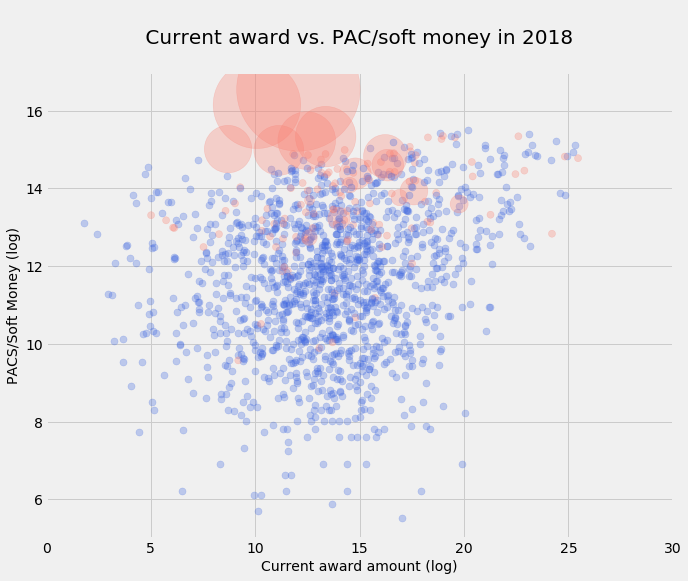

In [18]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

for yr in range(2008, 2019, 2):  
    d = input_data[input_data.year == yr]
    soft_1 = d[d.soft_dummy == 1]
    soft_0 = d[d.soft_dummy == 0]

    ax.scatter(soft_1.current_award_scaled_log, soft_1.pacs_plus_softorgs_log, s=soft_1.soft_dummy_size, alpha=0.3, color='salmon')
    ax.scatter(soft_0.current_award_scaled_log, soft_0.pacs_plus_softorgs_log, s=50, alpha=0.3, color='royalblue')

    ax.set_title(f'\n Current award vs. PAC/soft money in {yr} \n', size=20)
    ax.set_ylabel('PACS/Soft Money (log)', size=14)
    ax.set_xlabel('Current award amount (log)', size=14)

    ax.set_ylim([5,17])
    ax.set_xlim([0, 30])
    plt.savefig(os.getcwd() + f'/img/_current_award_vs_pac_soft_{yr}.png')